In [2]:
# dependencias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, signal
from statsmodels.tsa.stattools import adfuller, acf, pacf, q_stat
from statsmodels.tsa.api import SARIMAX
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox, jarque_bera
from scipy.signal import periodogram
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [108]:
df = pd.read_excel("C:/Users/oscar/Downloads/API_FR.INR.LEND_DS2_es_excel_v2_3416697.xlsx", header=3)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,7.300000,7.000000,6.900000,6.300000,6.000000,5.700000,6.800000,6.400000,6.100000,NaN
1,NaN,AFE,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afganistán,AFG,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,15.000000,15.000000,15.000000,14.836667,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,16.382271,16.881862,15.780504,15.806100,20.677004,19.295367,19.655895,19.403155,20.117211,16.920862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,10.615000,8.320000,7.446800,6.832700,6.654058,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep. del",YEM,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,Sudáfrica,ZAF,Tasa de interés activa (%),FR.INR.LEND,6.208333,6.833333,6.208333,5.5,5.791667,6.916667,...,9.125000,9.416667,10.458333,10.375000,10.083333,10.125000,7.708333,7.041667,8.791667,11.500000
264,Zambia,ZMB,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,11.573333,13.250000,15.500000,12.375000,9.791667,10.291667,9.479167,NaN,NaN,NaN


In [ ]:
(Asia, Oriente Medio,
Africa, Oceania, America, Europa), incluyendo de América a México


Kuwait medio oriente 



# 2.1. Asia 


* Zambia -- África al sur del Sahara (excluido altos ingresos)

* Líbano -- Oriente Medio y Norte de África (excluido altos ingresos)

* Malasia-- Asia

*  Australia      -- Oceania

*  Canadá      -- América 

*  Azerbaiyán  -- Europa

*  mex      -- América a México


# 2.1.1 Seleccion de datos
Para el analisis de la region de Asia se seleccionaron las tasas de interes activa

In [261]:
df = pd.read_excel("C:/Users/oscar/Downloads/API_FR.INR.LEND_DS2_es_excel_v2_3416697.xlsx", header=3)
df = df.query("`Country Name` == 'México'")

# Extraemos solo las columnas de los años (de 1960 a 2023)
df = df.iloc[:, 4:].transpose()

# Nombramos la columna de la serie como 'Tasa de interés activa (%)'
df.columns = ['Tasa de interés activa (%)']

# Aseguramos que los valores son de tipo float
df = df.astype(float)
df


,Tasa de interés activa (%)
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN
...,...
2019,8.429167
2020,6.341667
2021,5.265833
2022,8.179167


In [262]:
df['Tasa de interés activa (%)'].value_counts()

Tasa de interés activa (%)
18.225000    1
7.065000     1
8.179167     1
5.265833     1
6.341667     1
8.429167     1
8.040000     1
7.332500     1
4.754167     1
3.439167     1
3.551667     1
4.270833     1
4.680833     1
4.910833     1
5.280833     1
8.705768     1
19.300000    1
7.560833     1
7.511835     1
9.695000     1
7.438333     1
7.022500     1
8.210833     1
12.795000    1
16.928333    1
23.742500    1
26.358333    1
22.140000    1
36.385833    1
59.431667    1
11.591667    1
Name: count, dtype: int64

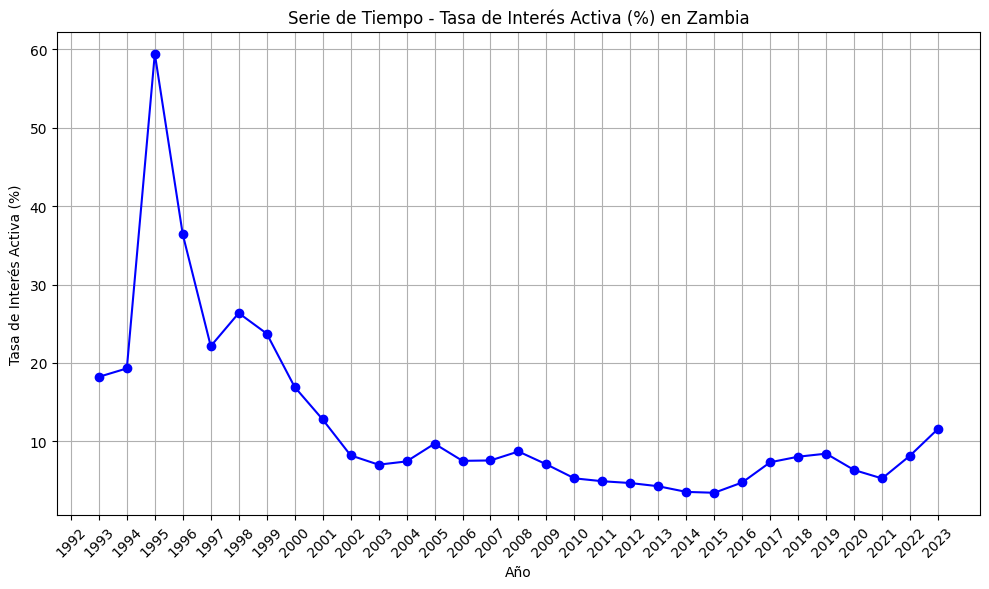

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Tasa de interés activa (%)'], marker='o', linestyle='-', color='b')
plt.title('Serie de Tiempo - Tasa de Interés Activa (%) en Zambia')
plt.xlabel('Año')
plt.ylabel('Tasa de Interés Activa (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [264]:
# Aplicar la prueba ADF
result = adfuller(df['Tasa de interés activa (%)'].dropna(), autolag='AIC')

# Extraer los resultados
valor_p = result[1]
num_lags = result[2]
valores_criticos = result[4]

# Mostrar los resultados
print(f"Valor p: {valor_p}")
print(f"Número de lags usados: {num_lags}")
print("Valores críticos:")
for key, value in valores_criticos.items():
    print(f"  {key}: {value}")

Valor p: 2.374560685948724e-14
Número de lags usados: 2
Valores críticos:
  1%: -3.6889256286443146
  5%: -2.9719894897959187
  10%: -2.6252957653061224


In [265]:
result = adfuller(df['Tasa de interés activa (%)'].dropna(), autolag='AIC')

# Extraemos el valor p de la prueba
valor_p = result[1]

# Mostrar el valor p y tomar una decisión
print(f"Valor p de la prueba ADF: {valor_p}")

# Si la serie no es estacionaria (valor p > 0.05), aplicamos Box-Cox
if valor_p > 0.05:
    print("La serie no es estacionaria. Aplicando Box-Cox...")
    
    # Extraemos la serie sin NaN
    df_clean = df['Tasa de interés activa (%)'].dropna()

    # Verificamos si hay valores negativos o cero y los ajustamos
    if (df_clean <= 0).any():
        df_clean = df_clean + abs(df_clean.min()) + 1  # Agregamos el valor mínimo absoluto y 1

    # Aplicamos la transformación Box-Cox
    df_boxcox, lambda_ = stats.boxcox(df_clean)

    # Imprimimos el valor de lambda
    print(f"Valor de lambda en la transformación Box-Cox: {lambda_}")

    # Realizamos nuevamente la prueba ADF sobre la serie transformada
    result_boxcox = adfuller(df_boxcox)
    valor_p_boxcox = result_boxcox[1]
    print(f"Valor p (después de Box-Cox): {valor_p_boxcox}")
    
    # Graficamos solo si la serie fue transformada
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[:len(df_boxcox)], df_boxcox, marker='o', linestyle='-', color='r')
    plt.title('Serie de Tiempo Transformada - Box-Cox')
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés activa (%) - Box-Cox')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("La serie ya es estacionaria. No se aplica Box-Cox.")

Valor p de la prueba ADF: 2.374560685948724e-14
La serie ya es estacionaria. No se aplica Box-Cox.


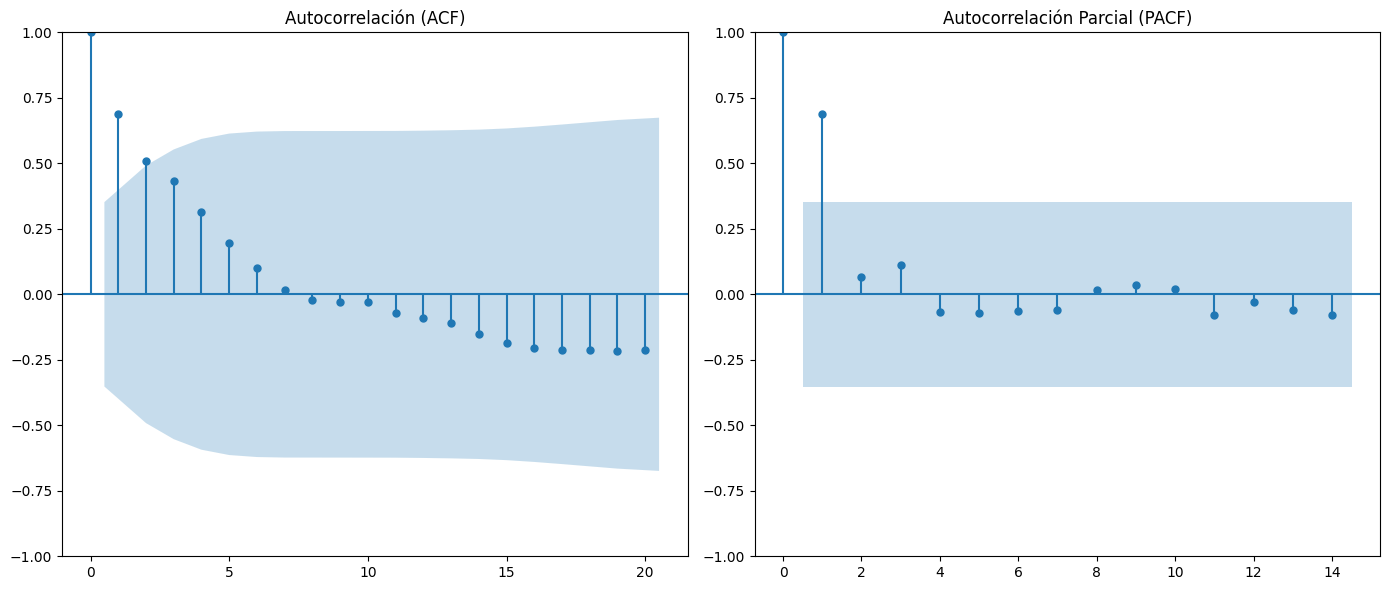

In [266]:
# Selección de la serie
series_to_plot = df_boxcox if valor_p > 0.05 else df['Tasa de interés activa (%)'].dropna()

# Determinamos el número de lags según el tamaño de la serie
max_lags = min(len(series_to_plot) - 1, 20)  # Usamos el mínimo entre 20 o el tamaño de la serie - 1
max_lags_pacf = len(series_to_plot) // 2 - 1  # Para PACF, el máximo es el 50% del tamaño de la serie

# Si max_lags es mayor que el máximo permitido para PACF, lo ajustamos
max_lags_pacf = min(max_lags_pacf, max_lags)

# Crear las gráficas de ACF y PACF
plt.figure(figsize=(14, 6))

# Subgráfico para ACF
plt.subplot(1, 2, 1)
plot_acf(series_to_plot, lags=max_lags, ax=plt.gca())
plt.title('Autocorrelación (ACF)')

# Subgráfico para PACF
plt.subplot(1, 2, 2)
plot_pacf(series_to_plot, lags=max_lags_pacf, ax=plt.gca())
plt.title('Autocorrelación Parcial (PACF)')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

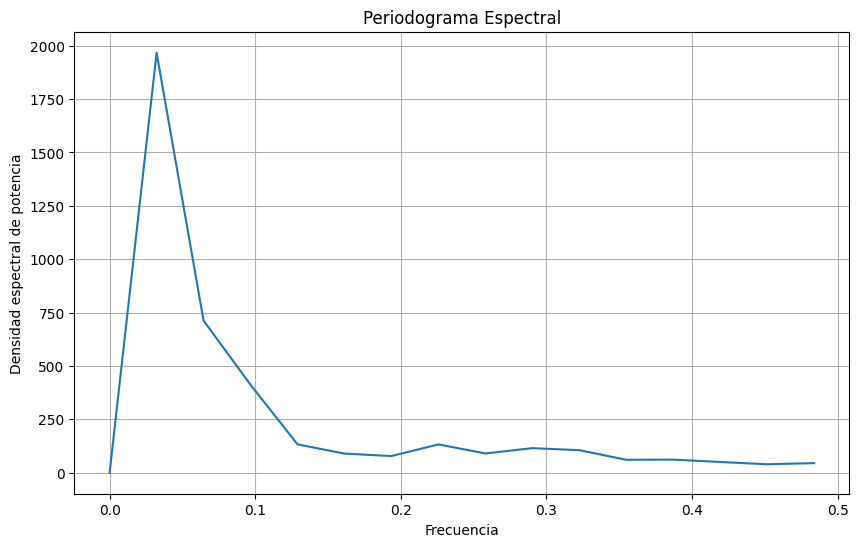

In [267]:
# Selección de la serie
series_to_plot = df_boxcox if valor_p > 0.05 else df['Tasa de interés activa (%)'].dropna()

# Calcular el periodograma
frequencies, power = periodogram(series_to_plot)

# Graficar el periodograma espectral
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power)
plt.title('Periodograma Espectral')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()

Parámetros del modelo SARIMA ajustado:
                                     SARIMAX Results                                      
Dep. Variable:         Tasa de interés activa (%)   No. Observations:                   31
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -7.468
Date:                            Thu, 14 Nov 2024   AIC                             24.936
Time:                                    23:00:03   BIC                             21.868
Sample:                                01-01-1993   HQIC                            18.203
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6064      4.432      0.137      0.891      -8.080       9.

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000024A3A8F5D50>.

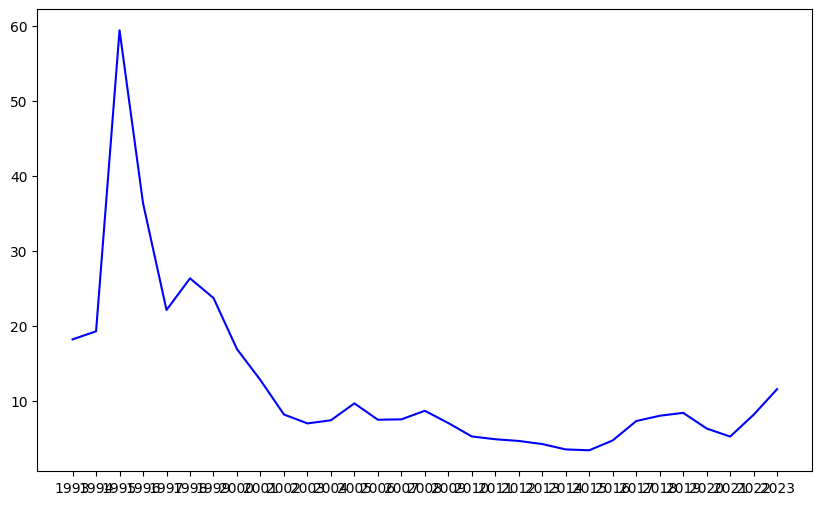

In [268]:
# Selección de la serie de datos (con o sin transformación Box-Cox)
series_to_train = df_boxcox if valor_p > 0.05 else df['Tasa de interés activa (%)'].dropna()

# Ajustar el modelo SARIMA automáticamente con la función SARIMAX
sarima_model = SARIMAX(series_to_train,
                       order=(1, 1, 1),  # Ajustar p, d, q según el análisis previo o dejar como 1, 1, 1 como punto de partida
                       seasonal_order=(1, 1, 1, 12),  # Ajustar P, D, Q, s (estacionalidad, s=12 si es anual)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Ajustar el modelo
sarima_model_fit = sarima_model.fit(disp=False)

# Mostrar los parámetros ajustados
print("Parámetros del modelo SARIMA ajustado:")
print(sarima_model_fit.summary())

# Realizar las predicciones para el conjunto de entrenamiento (in-sample predictions)
train_predictions = sarima_model_fit.predict(start=0, end=len(series_to_train)-1, dynamic=False)

# Predicciones a futuro (por ejemplo, los próximos 12 períodos)
forecast_steps = 12
forecast = sarima_model_fit.predict(start=len(series_to_train), end=len(series_to_train)+forecast_steps-1)

# Graficar los datos originales y las predicciones (in-sample y a futuro)
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.plot(series_to_train, label='Datos de entrenamiento', color='blue')

# Graficar las predicciones del modelo (in-sample)
plt.plot(train_predictions, label='Predicciones del modelo (in-sample)', color='red', linestyle='--')

# Graficar las predicciones futuras
plt.plot(range(len(series_to_train), len(series_to_train) + forecast_steps), forecast, label='Predicciones a futuro', color='green', linestyle='--')

# Títulos y etiquetas
plt.title('Entrenamiento y Predicciones del Modelo SARIMA')
plt.xlabel('Año')
plt.ylabel('Tasa de interés activa (%)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Evaluación del modelo en el conjunto de entrenamiento (RMSE y MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(series_to_train, train_predictions, squared=False)
mae = mean_absolute_error(series_to_train, train_predictions)

print(f"RMSE (Error Cuadrático Medio): {rmse}")
print(f"MAE (Error Absoluto Medio): {mae}")


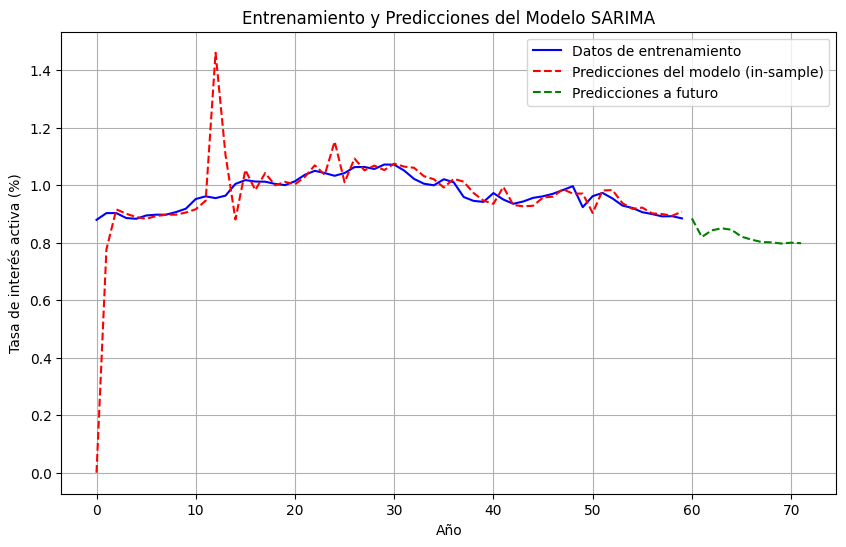

In [260]:
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.plot(series_to_train, label='Datos de entrenamiento', color='blue')

# Graficar las predicciones del modelo (in-sample)
plt.plot(train_predictions, label='Predicciones del modelo (in-sample)', color='red', linestyle='--')

# Graficar las predicciones futuras
plt.plot(range(len(series_to_train), len(series_to_train) + forecast_steps), forecast, label='Predicciones a futuro', color='green', linestyle='--')

# Títulos y etiquetas
plt.title('Entrenamiento y Predicciones del Modelo SARIMA')
plt.xlabel('Año')
plt.ylabel('Tasa de interés activa (%)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()
